# 采用cnn模型实现对猫狗图片的二分类

## 一. 数据加载
通过ImageDataGenerator进行图像的增强与预处理（将图片尺寸转化为50*50，设置分类模式为二分类），将数据归一化，并载入图片。

In [1]:
# 加载数据
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
train_set = train_datagen.flow_from_directory('./dataset/training_set',target_size=(50,50),batch_size=32,class_mode='binary')

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Found 8000 images belonging to 2 classes.


## 二.建立CNN模型
1. 第一层卷积层共有32个filter，每一个filter的大小为4*4，且步长为1.激活函数采用relu
2. 第一层池化层采用最大池化，池化尺寸为2*2，步长为1
3. 第二层卷积层共有32个filter，每一个filter的大小为4*4，且步长为1.激活函数采用relu
4. 第二层池化层采用最大池化，池化尺寸为2*2，步长为1
5. 对处理结果进行展开
5. 建立mlp模型，采用128个神经元，激活函数为relu，输出一个型号，激活函数为sigmoid

In [2]:
# 建立cnn模型
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

model = Sequential()
# CONV
model.add(Conv2D(32,(4,4),input_shape=(50,50,3),activation='relu'))
# MaxPool
model.add(MaxPool2D(pool_size=(2,2)))
# CONV
model.add(Conv2D(32,(4,4),activation='relu'))
# MaxPool
model.add(MaxPool2D(pool_size=(2,2)))
# flattening layer
model.add(Flatten())
# FC layer
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 47, 47, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               409728    
________________________________________________

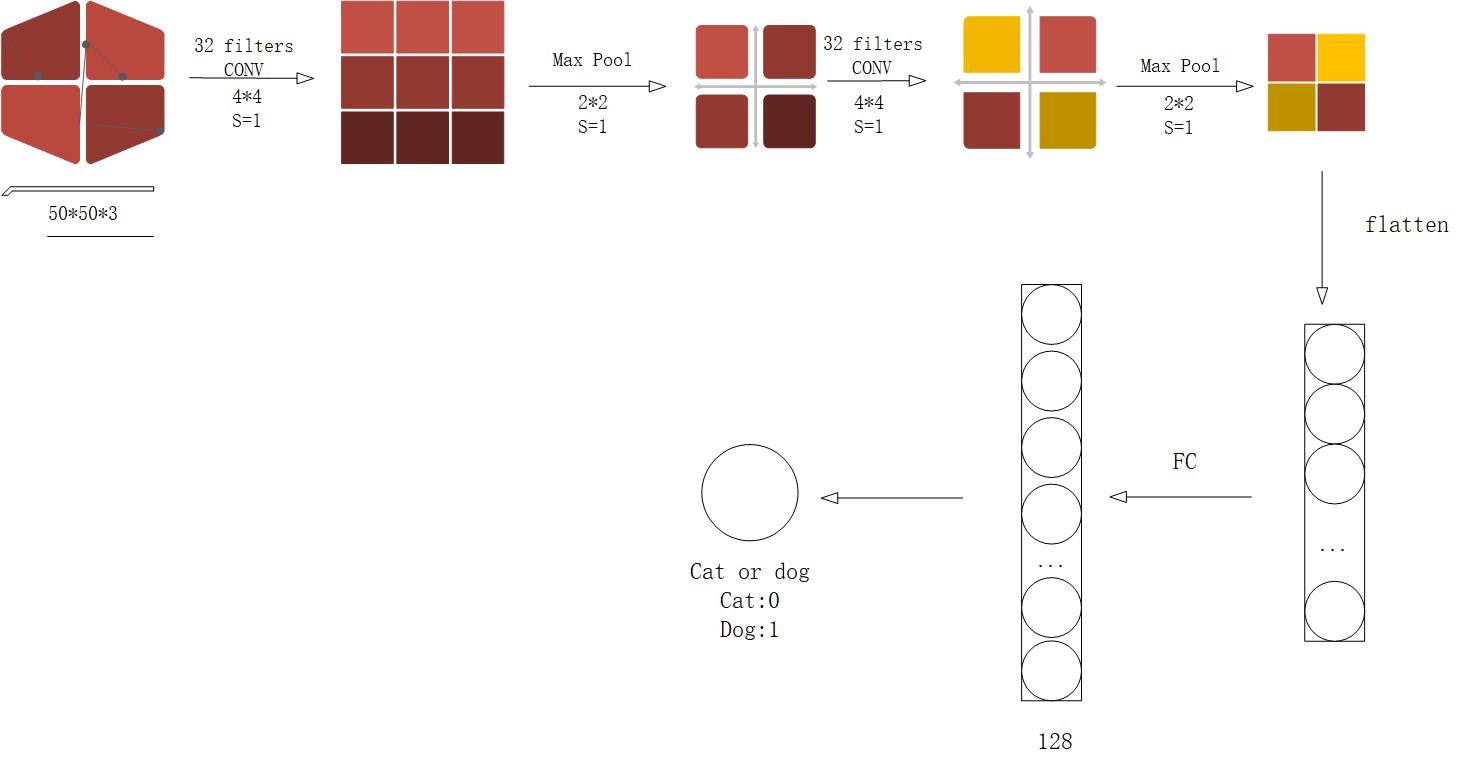

## 三.模型求解参数配置与训练
1. 采用adam作为模型的优化器
2. 采用binary_crossentropy作为模型的损失函数
3. 采用metrics=['accuracy']提供模型训练时的准确率
4. 采用30次迭代训练模型

In [3]:
# 配置模型
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [4]:
# 训练模型
model.fit_generator(train_set,epochs=30)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
250/250 [==============================] - 29s 118ms/step - loss: 0.6760 - accuracy: 0.5744
Epoch 2/30
250/250 [==============================] - 28s 113ms/step - loss: 0.6141 - accuracy: 0.6607
Epoch 3/30
250/250 [==============================] - 28s 112ms/step - loss: 0.5636 - accuracy: 0.7060
Epoch 4/30
250/250 [==============================] - 31s 123ms/step - loss: 0.5323 - accuracy: 0.7308
Epoch 5/30
250/250 [==============================] - 33s 130ms/step - loss: 0.4755 - accuracy: 0.7664
Epoch 6/30
250/250 [==============================] - 32s 127ms/step - loss: 0.4235 - accuracy: 0.7996
Epoch 7/30
250/250 [==============================] - 31s 123ms/step - loss: 0.3644 - accuracy: 0.8360
Epoch 8/30
250/250 [==============================] - 27s 108ms/step - loss: 0.2932 - accuracy: 0.8720
Epoch 9/30
250/250 [==============================] - 30s 120ms/step - loss: 0.2260 - accuracy: 0.9070
Epoch 10/30
250/250 [====

## 四. 计算模型准确率
对于训练集，模型预测准确率为1.0。
对于测试集，模型预测准确率为0.73。

In [5]:
# 计算模型准确率
accuracy_train = model.evaluate_generator(train_set)
print(accuracy_train)

[9.22537874430418e-05, 1.0]


In [6]:
test_set = train_datagen.flow_from_directory('./dataset/test_set',target_size=(50,50),batch_size=32,class_mode='binary')
accuracy_train = model.evaluate_generator(test_set)
print(accuracy_train)

Found 2000 images belonging to 2 classes.
[1.2192351818084717, 0.7379999756813049]


In [7]:
# 查看模型分类
train_set.class_indices

{'cats': 0, 'dogs': 1}

## 五. 模型中间层可视化

In [8]:
#查看各层位置
for index in range(7):
    layer = model.get_layer(index=index)
    print(layer)

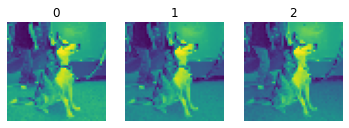

[[1]]


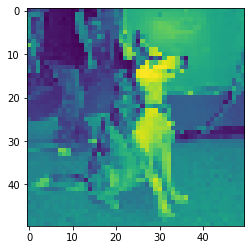

In [24]:
# 加载单张图片
from keras.preprocessing.image import load_img, img_to_array
%matplotlib inline
from matplotlib import pyplot as plt
pic_dog = 'dog.jpg'
pic_dog = load_img(pic_dog,target_size=(50,50))
pic_dog = img_to_array(pic_dog)
fig1 = pic_dog[:,:,0]
for i in range(3):
    fig = pic_dog[:,:,i]
    plt.subplot(1,3,i+1)
    plt.imshow(fig)
    plt.axis("off")
    plt.title(i)
    fig1 = fig1 + pic_dog[:,:,i]
plt.show()
fig1 = fig1 - pic_dog[:,:,0]
plt.imshow(fig1)
pic_dog = pic_dog/255
pic_dog = pic_dog.reshape(1,50,50,3)
result = model.predict_classes(pic_dog)
print(result)

(1, 47, 47, 32)
(47, 47, 32)


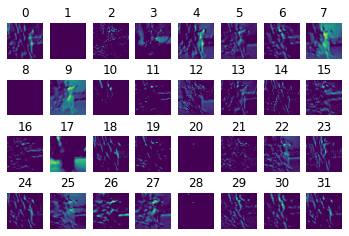

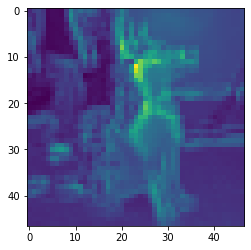

In [23]:
# 可视化第一层卷积层
from keras.models import Model
layer_model = Model(inputs = model.input,outputs = model.get_layer(index = 0).output)
result = layer_model.predict(pic_dog)
print(result.shape)
result = result.reshape(47,47,32)
print(result.shape)
fig1 = result[:,:,0]
for i in range(32):
    fig = result[:,:,i]
    plt.subplot(4,8,(i+1))
    plt.axis('off')
    plt.imshow(fig)
    plt.title(i)
    fig1 = fig1 + result[:,:,i]
plt.show()
fig1 = fig1 - result[:,:,0]
plt.imshow(fig1)
    

(1, 23, 23, 32)
(23, 23, 32)


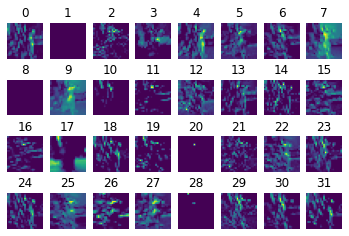

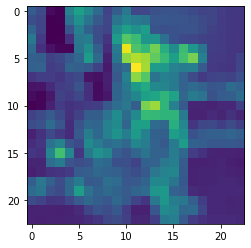

In [25]:
# 可视化第一层池化层
layer_model = Model(inputs = model.input,outputs = model.get_layer(index = 1).output)
result = layer_model.predict(pic_dog)
print(result.shape)
result = result.reshape(23,23,32)
print(result.shape)
from matplotlib import pyplot as plt
fig1 = result[:,:,0]
for i in range(32):
    fig = result[:,:,i]
    plt.subplot(4,8,(i+1))
    plt.axis('off')
    plt.imshow(fig)
    plt.title(i)
    fig1 = fig1 + result[:,:,i]
plt.show()
fig1 = fig1 - result[:,:,0]
plt.imshow(fig1)    

(1, 20, 20, 32)
(20, 20, 32)


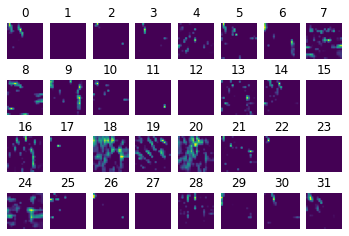

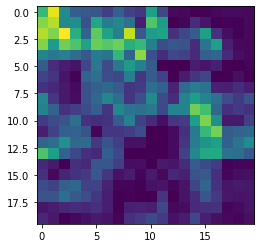

In [26]:
# 可视化第二层卷积层
layer_model = Model(inputs = model.input,outputs = model.get_layer(index = 2).output)
result = layer_model.predict(pic_dog)
print(result.shape)
result = result.reshape(20,20,32)
print(result.shape)
from matplotlib import pyplot as plt
fig1 = result[:,:,0]
for i in range(32):
    fig = result[:,:,i]
    plt.subplot(4,8,(i+1))
    plt.axis('off')
    plt.imshow(fig)
    plt.title(i)
    fig1 = fig1 + result[:,:,i]
plt.show()
fig1 = fig1 - result[:,:,0]
plt.imshow(fig1) 

(1, 10, 10, 32)
(10, 10, 32)


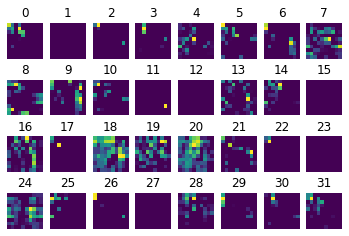

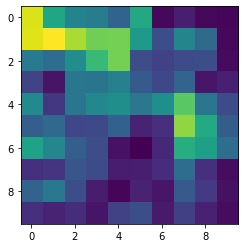

In [27]:
# 可视化第二层池化层
layer_model = Model(inputs = model.input,outputs = model.get_layer(index = 3).output)
result = layer_model.predict(pic_dog)
print(result.shape)
result = result.reshape(10,10,32)
print(result.shape)
from matplotlib import pyplot as plt
fig1 = result[:,:,0]
for i in range(32):
    fig = result[:,:,i]
    plt.subplot(4,8,(i+1))
    plt.axis('off')
    plt.imshow(fig)
    plt.title(i)
    fig1 = fig1 + result[:,:,i]
plt.show()
fig1 = fig1 - result[:,:,0]
plt.imshow(fig1) 